In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train=pd.read_csv(r'F:\important\Data analyst\Projects\Loan Prediction Analysis ML\train_data.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test=pd.read_csv(r'F:\important\Data analyst\Projects\Loan Prediction Analysis ML\test_data.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_orginal_data=train.copy()
test_orginal_data=test.copy()

In [6]:
#12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset.
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape

(614, 13)

In [10]:
test.shape

(367, 12)

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
#Normalizing
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

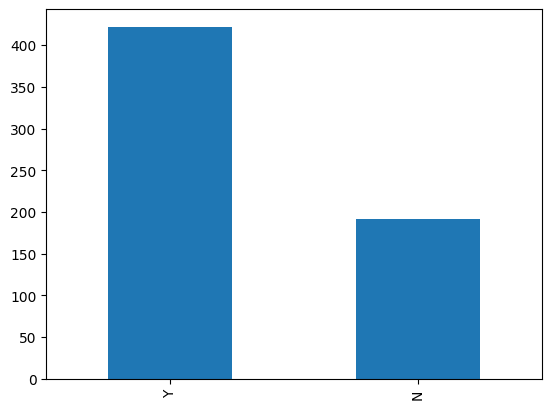

In [14]:
train['Loan_Status'].value_counts().plot.bar()

Independent Variable (Categorical)

<Axes: title={'center': 'Gender'}>

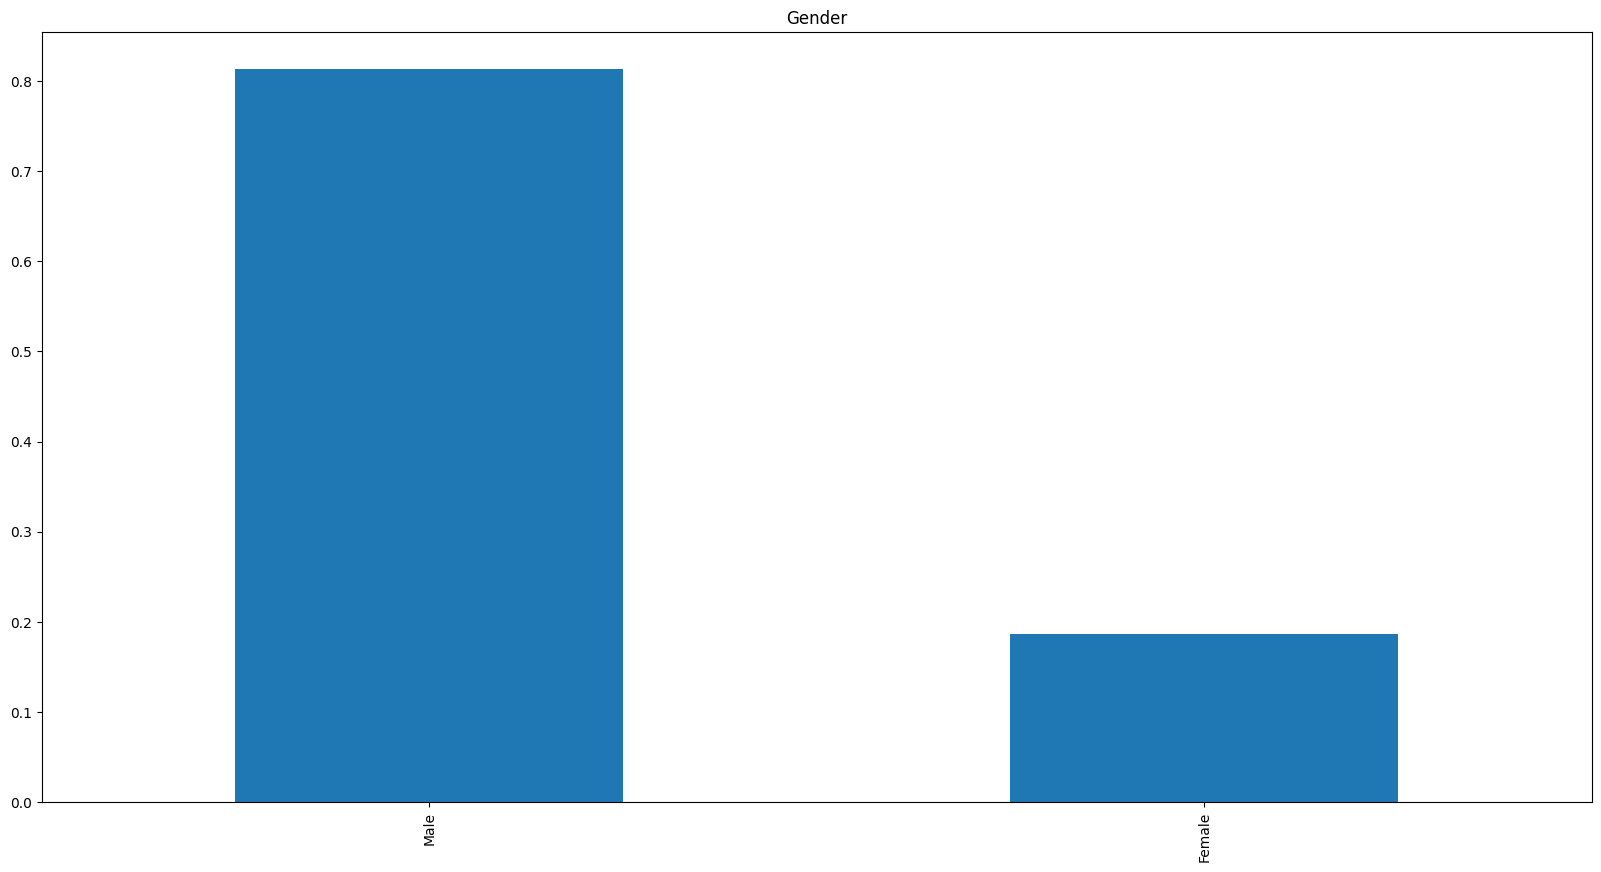

In [15]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender',figsize=(20,10))

<Axes: title={'center': 'Married'}>

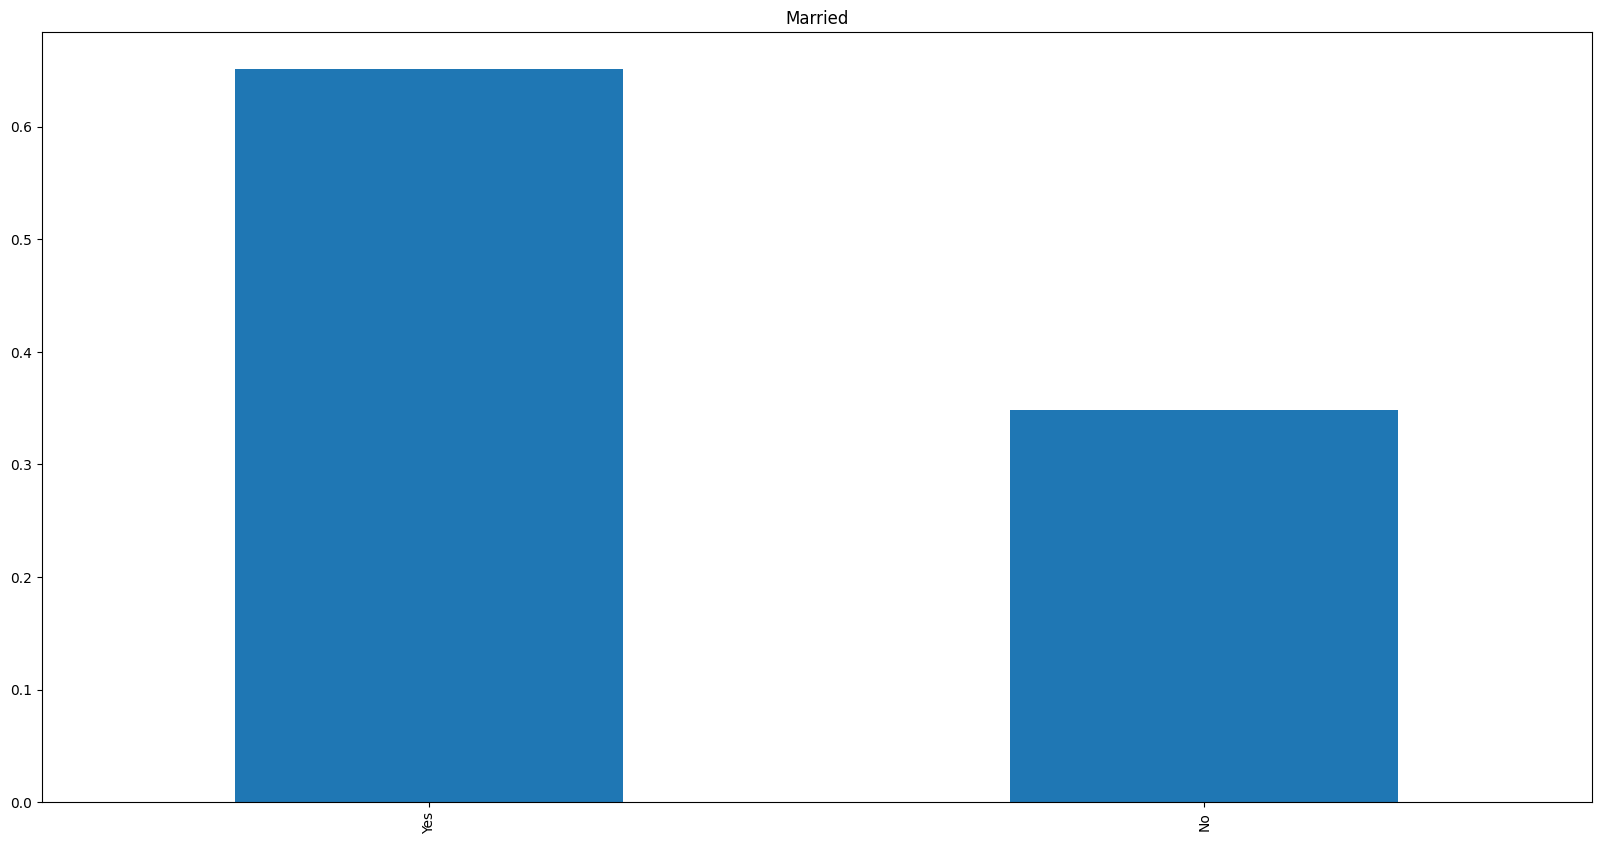

In [16]:
train['Married'].value_counts(normalize=True).plot.bar(title='Married',figsize=(20,10))

Independent Variable (Ordinal)

<Axes: title={'center': 'Dependents'}>

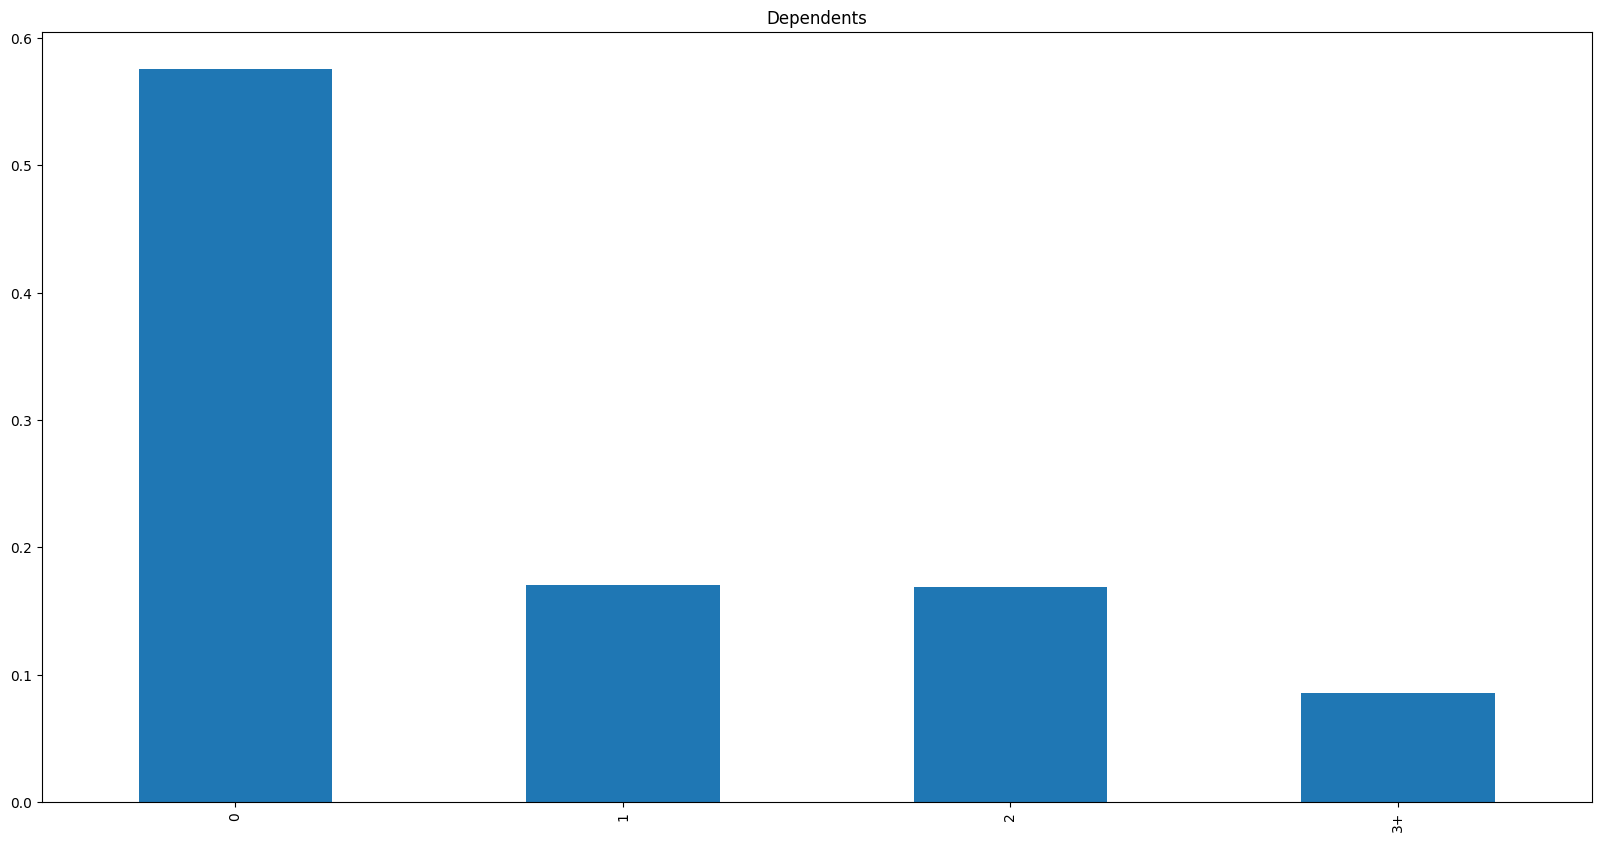

In [17]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents',figsize=(20,10))

<Axes: title={'center': 'Education'}>

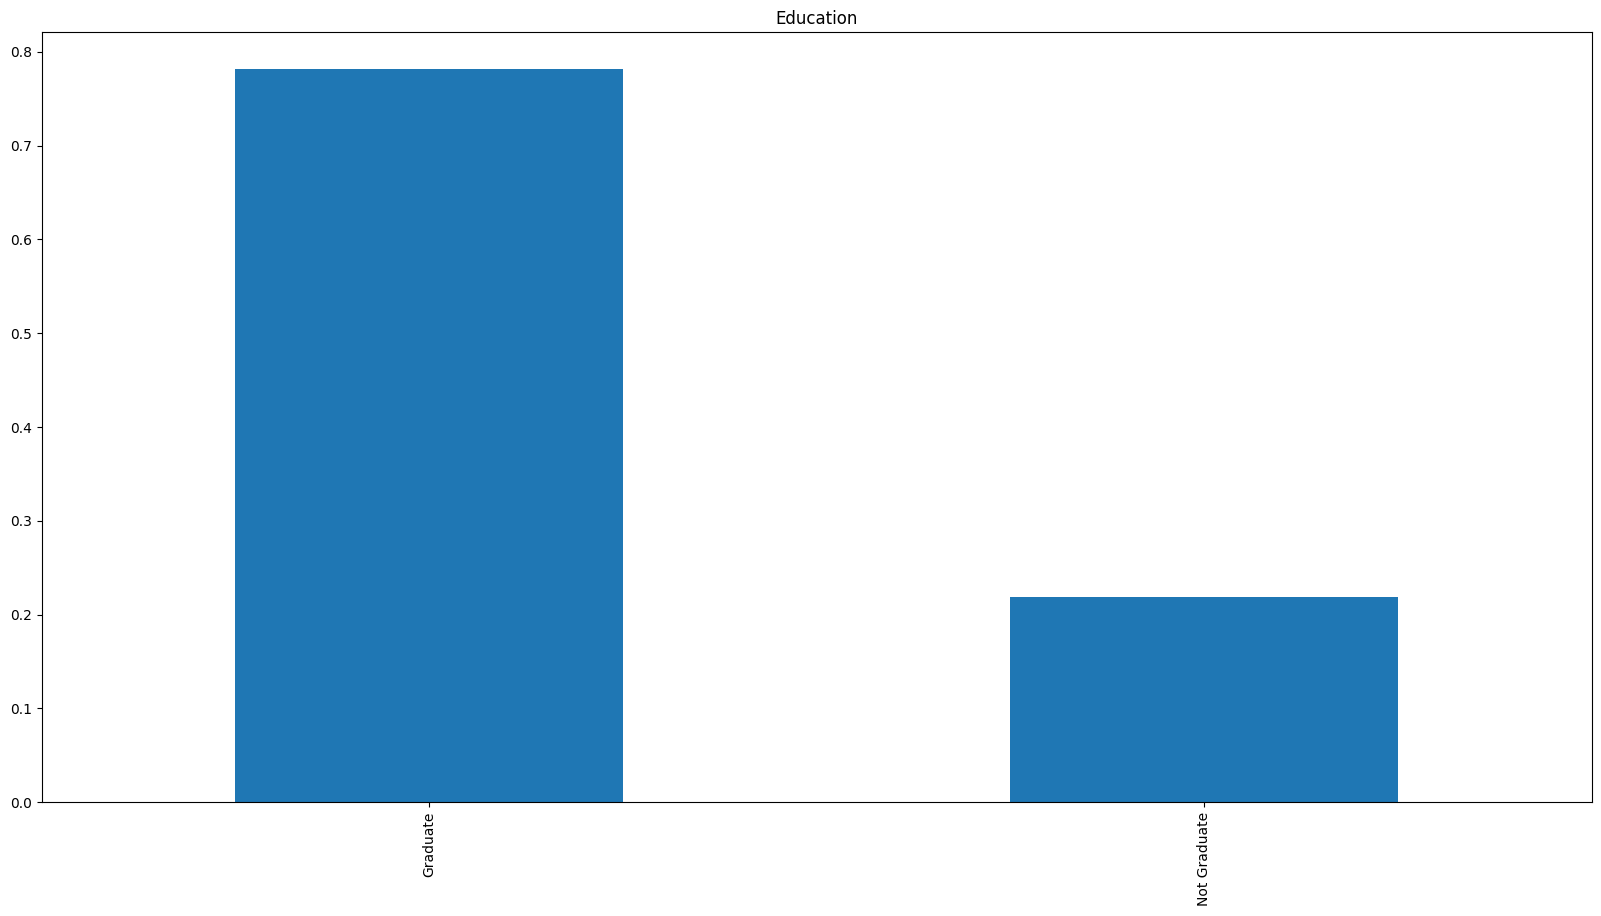

In [18]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education',figsize=(20,10))

Independent Variable (Numerical)

C:\Users\Arunprasath Manickam\AppData\Local\Temp\ipykernel_15836\4205472628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

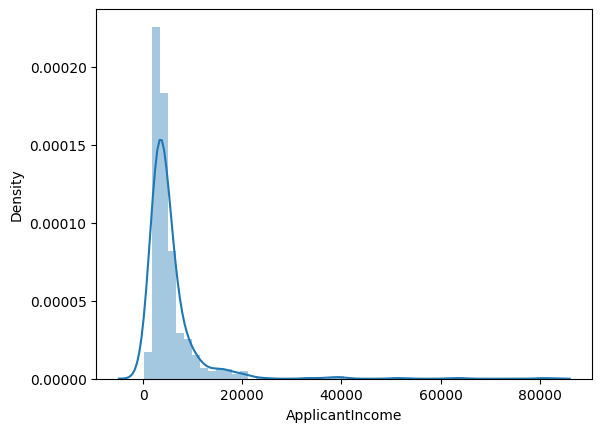

In [22]:
sns.distplot(train['ApplicantIncome'])

<Axes: >

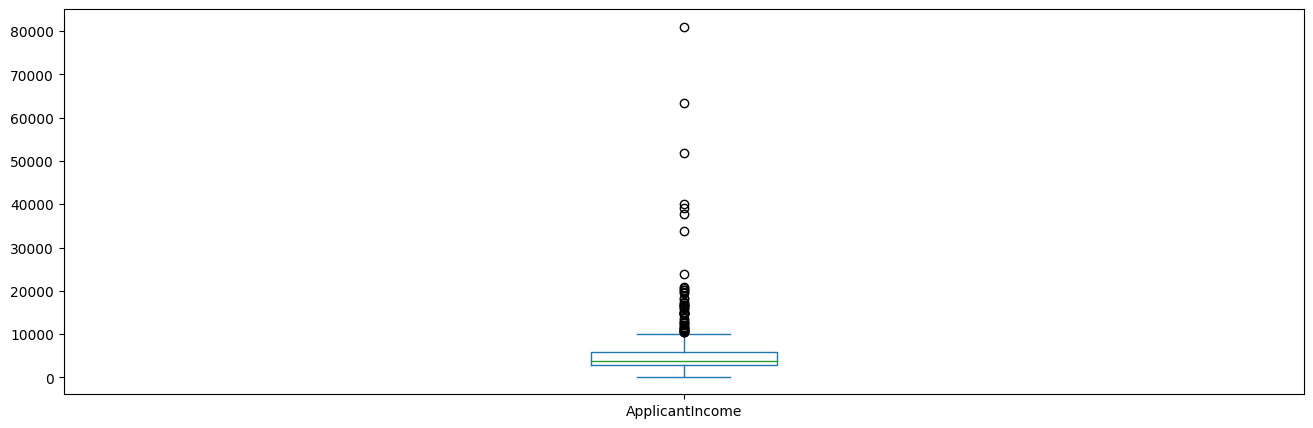

In [24]:
train['ApplicantIncome'].plot.box(figsize=(16,5))

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

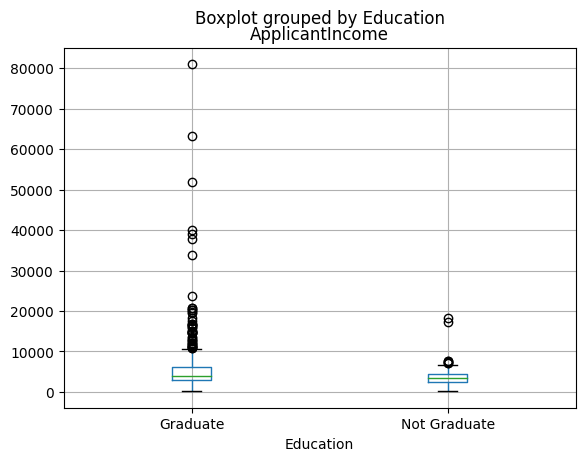

In [25]:
train.boxplot(column='ApplicantIncome',by='Education')